In [2]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import signal
#plt.style.use('../../sys.mplstyle')

def plot_filt(mag, freqs, title, ax):
    eps = np.finfo(float).eps
    mag_db = 20*np.log10(abs(mag)+eps)
    ax.semilogx(freqs, mag_db)
    ax.set_xlim(2**(-5),2**(5))
    xfreqs = [(2**i) for i in range(-5,6)]
    ax.set_xticks(xfreqs)
    ax.set_xticklabels(['$G^{%i}$'%i for i in range(-5,6)])
    ax.set_title(title)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude [dB]')
    ax.set_ylim(-80,2)

In [3]:
fs = 44100
order = 10
fc = 1000
fsup = np.power(2.0, 1/2) * fc / (fs / 2)
finf = np.power(2.0, -1/2) * fc / (fs / 2)

0.06413666949537847


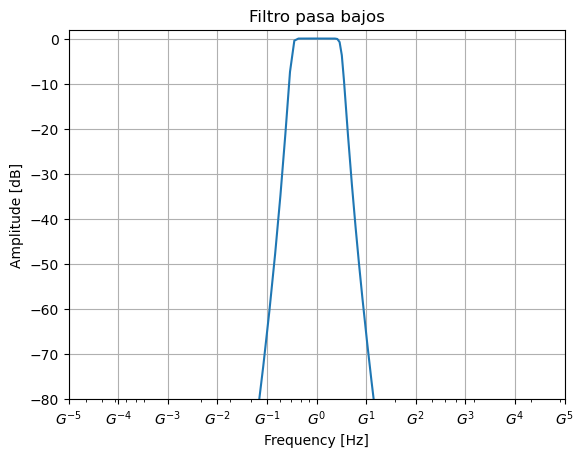

In [5]:
sos = signal.butter(order, [finf, fsup], btype='bandpass', output='sos')
w, h = signal.sosfreqz(sos)
w_freqz = (w*fs)/(2*np.pi)
h_mag = abs(h)
fig, ax = plt.subplots(1)
plot_filt(h_mag, w_freqz/fc, 'Filtro pasa bajos',ax)
ax.grid()

In [6]:
import pandas as pd
curvas = pd.read_csv('curvas.csv')
curvas.sort_values(by='G_exp', inplace=True)
curvas.head(1)

,G_exp,clase_0_inf,clase_0_sup,clase_1_inf,clase_1_sup,clase_2_inf,clase_2_sup
16,-4.0,75.0,100.0,70.0,100.0,60.0,100.0


In [7]:
curvas

,G_exp,clase_0_inf,clase_0_sup,clase_1_inf,clase_1_sup,clase_2_inf,clase_2_sup
16,-4.000,75.00,100.00,70.0,100.0,60.0,100.0
15,-3.000,62.00,100.00,61.0,100.0,55.0,100.0
14,-2.000,42.50,100.00,42.0,100.0,41.0,100.0
13,-1.000,18.00,100.00,17.5,100.0,16.5,100.0
12,-0.500,2.30,4.50,2.0,5.0,1.6,5.5
11,-0.375,-0.15,1.10,-0.3,1.3,-0.5,1.6
10,-0.250,-0.15,0.40,-0.3,0.6,-0.5,0.8
9,-0.125,-0.15,0.20,-0.3,0.4,-0.5,0.6
0,0.000,-0.15,0.15,-0.3,0.3,-0.5,0.5
1,0.125,-0.15,0.20,-0.3,0.4,-0.5,0.6


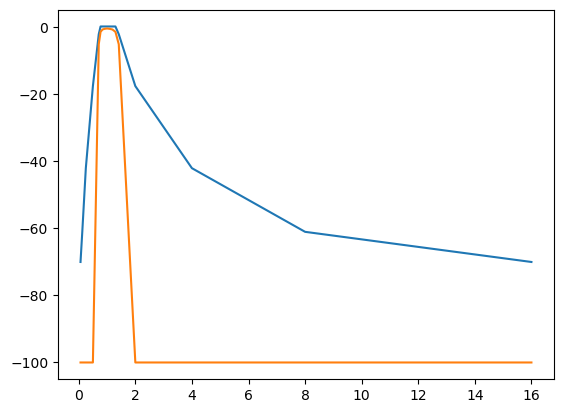

In [8]:
plt.plot(2**curvas.G_exp.values, -curvas.clase_1_inf.values)
plt.plot(2**curvas.G_exp.values, -curvas.clase_1_sup.values)



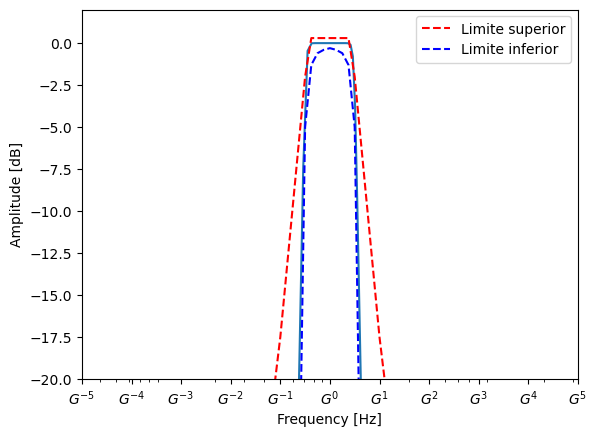

In [9]:
fig, ax = plt.subplots(1)
eps = np.finfo(float).eps
mag_db = 20*np.log10(abs(h_mag)+eps)
ax.semilogx(w_freqz/fc, mag_db)
ax.semilogx(2**curvas.G_exp.values, -curvas.clase_1_inf.values,'r--', label='Limite superior')
ax.semilogx(2**curvas.G_exp.values, -curvas.clase_1_sup.values, 'b--', label='Limite inferior')
ax.set_xlim(2**(-5),2**(5))
xfreqs = [(2**i) for i in range(-5,6)]
ax.set_xticks(xfreqs)
ax.set_xticklabels(['$G^{%i}$'%i for i in range(-5,6)])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.set_ylim(-20,2)
ax.legend()

In [11]:
# para tercios 
tercios = pd.read_csv('tercios.csv')
tercios.sort_values(by='f_norm', inplace=True)
tercios


,f_norm,clase_0_inf,clase_0_sup,clase_1_inf,clase_1_sup,clase_2_inf,clase_2_sup
12,0.32578,62.00,100.00,61.0,100.0,55.0,100.0
10,0.52996,42.50,100.00,42.0,100.0,41.0,100.0
8,0.77181,18.00,100.00,17.5,100.0,16.5,100.0
6,0.91932,-0.15,1.10,-0.3,1.3,-0.5,1.6
4,0.94702,-0.15,0.40,-0.3,0.6,-0.5,0.8
2,0.97394,-0.15,0.20,-0.3,0.4,-0.5,0.6
0,1.00000,-0.15,0.15,-0.3,0.3,-0.5,0.5
1,1.02676,-0.15,0.20,-0.3,0.4,-0.5,0.6
3,1.05594,-0.15,0.40,-0.3,0.6,-0.5,0.8
5,1.08776,-0.15,1.10,-0.3,1.3,-0.5,1.6


In [22]:
fs = 44100
order = 4
fc = 125
fsup = np.power(10**(3/10), 1/6) * fc / (fs / 2)
finf = np.power(10**(3/10), -1/6) * fc / (fs / 2)

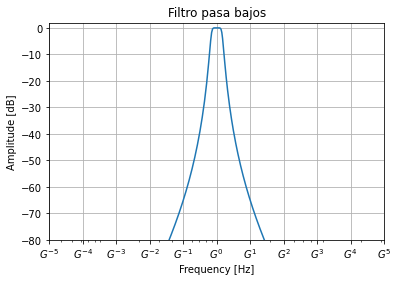

In [23]:
sos = signal.butter(order, [finf, fsup], btype='bandpass', output='sos')
w, h = signal.sosfreqz(sos, 10000)
w_freqz = (w*fs)/(2*np.pi)
h_mag = abs(h)
fig, ax = plt.subplots(1)
plot_filt(h_mag, w_freqz/fc, 'Filtro pasa bajos',ax)
ax.grid()

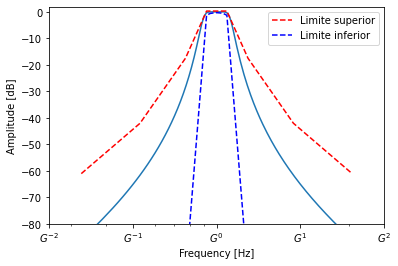

In [24]:
fig, ax = plt.subplots(1)
eps = np.finfo(float).eps
mag_db = 20*np.log10(abs(h_mag)+eps)
ax.semilogx(w_freqz/fc, mag_db)
ax.semilogx(tercios.f_norm.values, -tercios.clase_1_inf.values,'r--', label='Limite superior')
ax.semilogx(tercios.f_norm.values, -tercios.clase_1_sup.values, 'b--', label='Limite inferior')
ax.set_xlim(2**(-2),2**(2))
xfreqs = [(2**i) for i in range(-2,3)]
ax.set_xticks(xfreqs)
ax.set_xticklabels(['$G^{%i}$'%i for i in range(-2,3)])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.set_ylim(-80,2)
ax.legend()